# **Data Cleaning and Preprocessing**

# Import Libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

from sklearn.impute import KNNImputer

pd.set_option('future.no_silent_downcasting', True)

# Load the Dataset

In [3]:
from google.colab import files
uploaded = files.upload()

Saving city_day.csv to city_day.csv


In [65]:
 data = pd.read_csv('city_day.csv')

# Sanity check

In [66]:
data.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [67]:
data.shape

(29531, 16)

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [69]:
data.isnull().sum()/data.shape[0]*100

,0
City,0.000000
Date,0.000000
PM2.5,15.570079
PM10,37.723071
NO,12.129626
NO2,12.139785
NOx,14.171549
NH3,34.973418
CO,6.972334
SO2,13.050692


In [70]:
#finding duplicates
data.duplicated().sum()

0

In [71]:
#identifing garbage values
for i in data.select_dtypes(include="object").columns:
  print(data[i].value_counts())
  print("-"*20)

City
Ahmedabad             2009
Delhi                 2009
Mumbai                2009
Bengaluru             2009
Lucknow               2009
Chennai               2009
Hyderabad             2006
Patna                 1858
Gurugram              1679
Visakhapatnam         1462
Amritsar              1221
Jorapokhar            1169
Jaipur                1114
Thiruvananthapuram    1112
Amaravati              951
Brajrajnagar           938
Talcher                925
Kolkata                814
Guwahati               502
Coimbatore             386
Shillong               310
Chandigarh             304
Bhopal                 289
Ernakulam              162
Kochi                  162
Aizawl                 113
Name: count, dtype: int64
--------------------
Date
2020-07-01    26
2020-04-08    26
2020-04-10    26
2020-04-11    26
2020-04-12    26
              ..
2015-04-10     7
2015-01-04     7
2015-01-03     6
2015-01-02     6
2015-01-01     6
Name: count, Length: 2009, dtype: int64
--------------

In [72]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [73]:
data.describe(include="object").T

,count,unique,top,freq
City,29531,26,Ahmedabad,2009
Date,29531,2009,2020-07-01,26
AQI_Bucket,24850,6,Moderate,8829


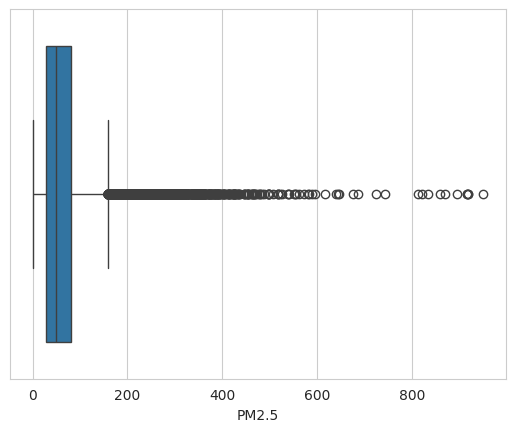

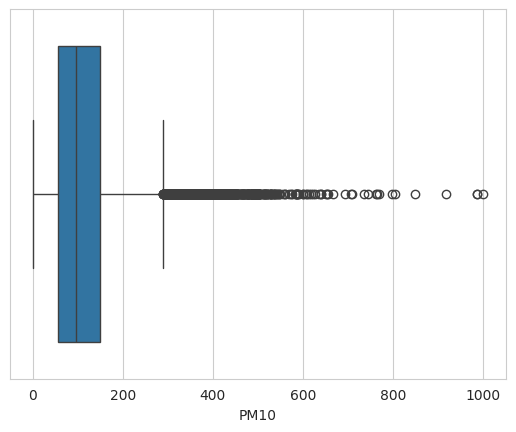

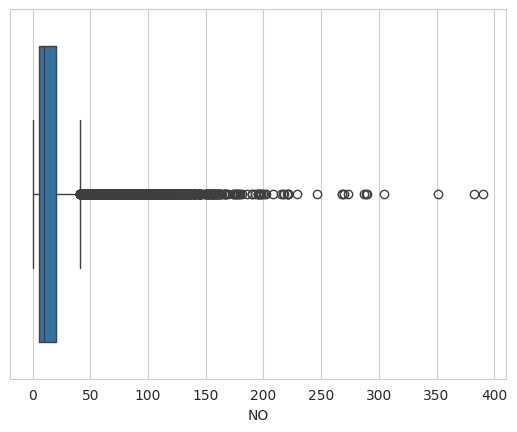

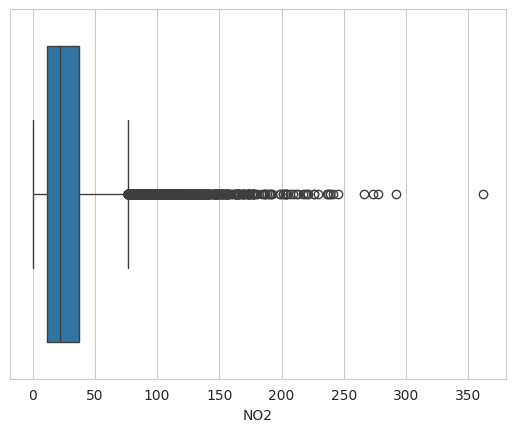

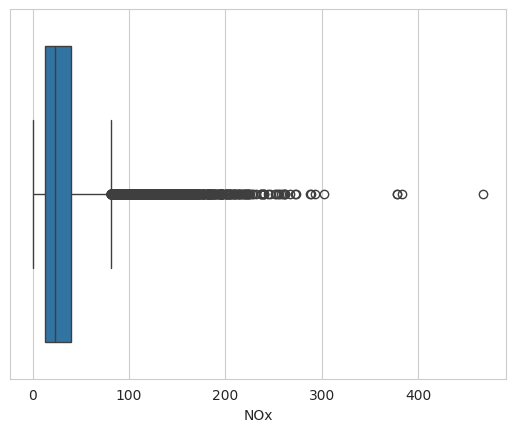

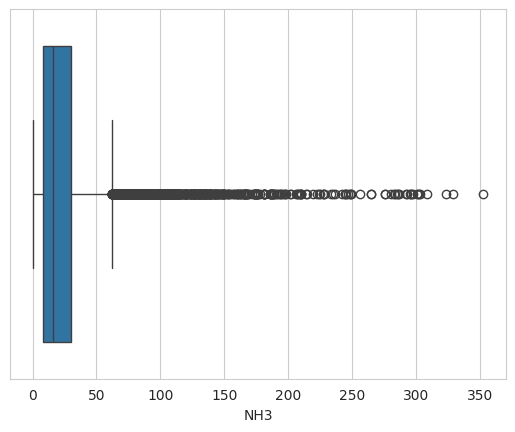

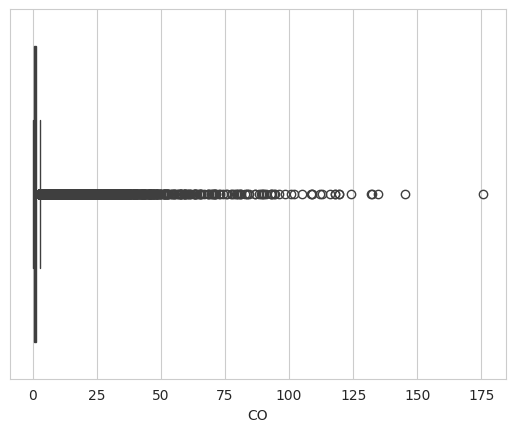

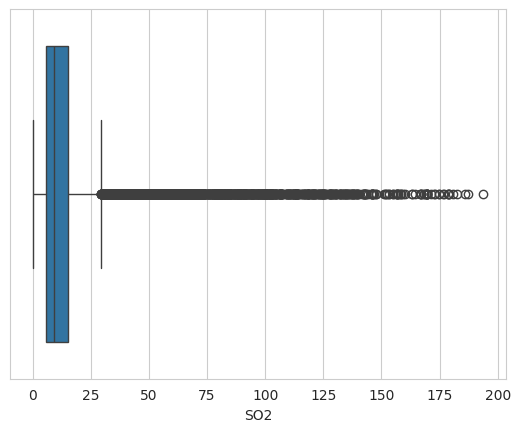

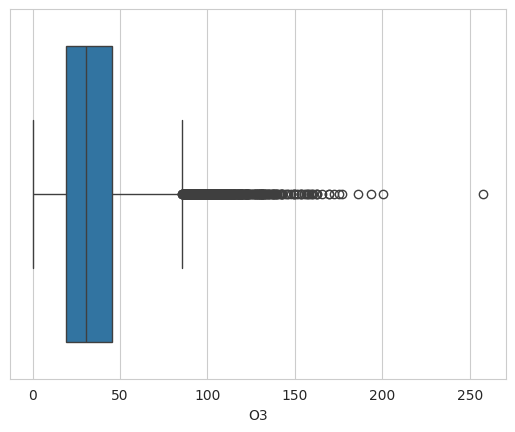

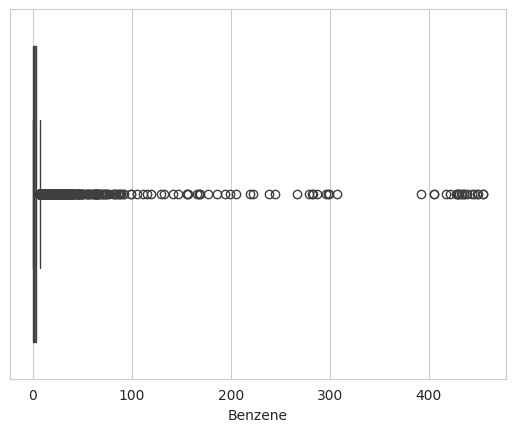

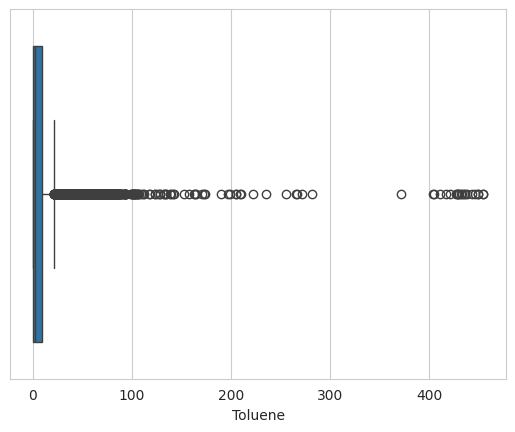

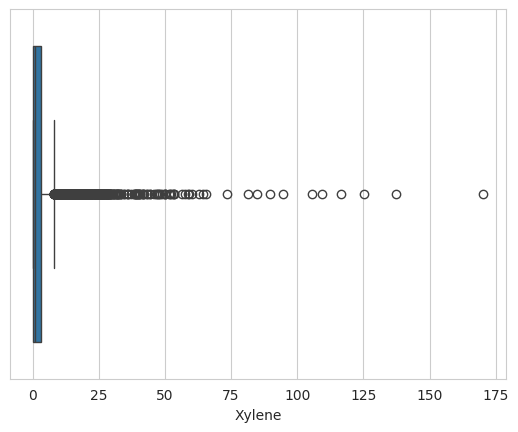

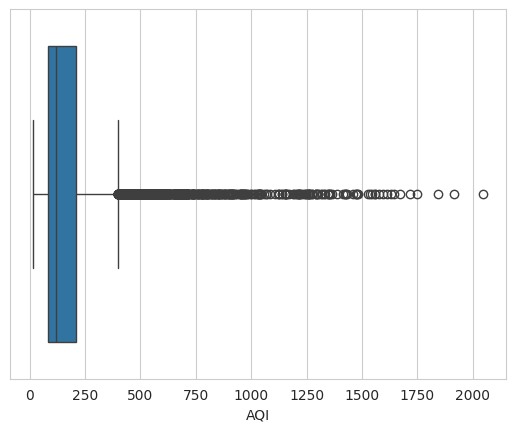

In [74]:
#finding outliers
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

In [75]:
data.select_dtypes(include="number").columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')

In [76]:
data.select_dtypes(include="object").columns

Index(['City', 'Date', 'AQI_Bucket'], dtype='object')

# Handling Missing Values

In [78]:
data['AQI_Bucket'] = data['AQI_Bucket'].replace(["(blank)", None], 'Unknown')

In [79]:
#numerical columns
median_columns = ['NO', 'NO2', 'NOx', 'NH3','CO', 'SO2', 'O3','Benzene', 'Toluene', 'Xylene', 'AQI']
for col in median_columns:
    if col in data.columns:
        data[col] = data[col].replace([0, '', None])
        median_value = data[col].median()
        data[col] = data[col].fillna(median_value).infer_objects()


<ipython-input-79-dd7185cf8478>:4: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  data[col] = data[col].replace([0, '', None])


In [80]:
knn_columns = ['PM2.5' ,'PM10']
if set(knn_columns).issubset(data.columns):
    knn_data = data[knn_columns].replace([0, '', None])
    imputer = KNNImputer(n_neighbors=5)
    knn_imputed = imputer.fit_transform(knn_data)
    knn_imputed_df = pd.DataFrame(knn_imputed, columns=knn_columns)
    data[knn_columns] = knn_imputed_df

<ipython-input-80-bea17a948ab1>:3: FutureWarning: DataFrame.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  knn_data = data[knn_columns].replace([0, '', None])


In [81]:
#categorical columns
if 'AQI' in data.columns:
    bins = [0, 50, 100, 200, 300, float('inf')]
    labels = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor']

    data['AQI_Bucket'] = pd.cut(data['AQI'], bins=bins, labels=labels, right=False)

# Handling Outliers

In [82]:
def wisker(col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3-q1
  lower = q1-1.5*iqr
  upper = q3+1.5*iqr
  return lower,upper

In [83]:
wisker('PM2.5')

(-44.95500000000001, 152.76500000000001)

In [84]:
for i in data.select_dtypes(include="number").columns:
  lower,upper = wisker(i)
  data[i] = np.where(data[i]<lower,lower,data[i])
  data[i] = np.where(data[i]>upper,upper,data[i])

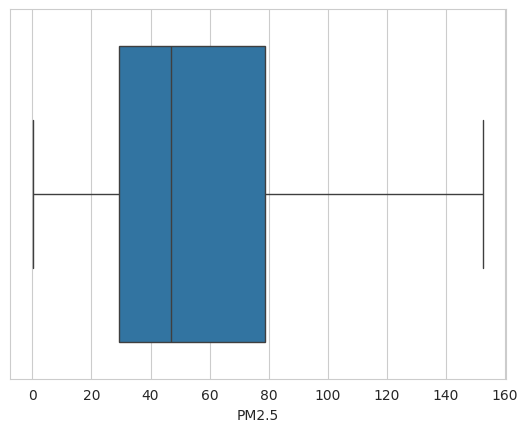

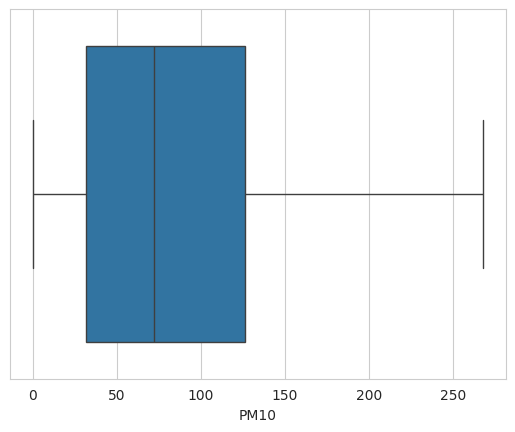

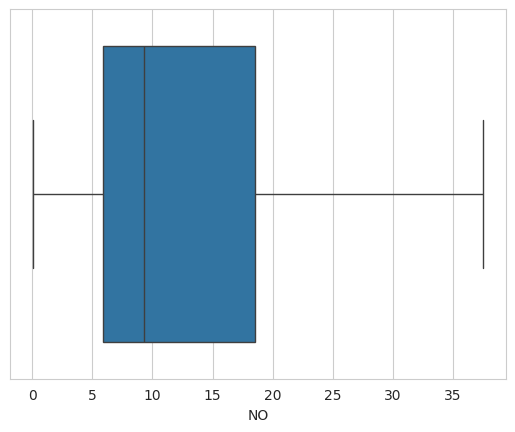

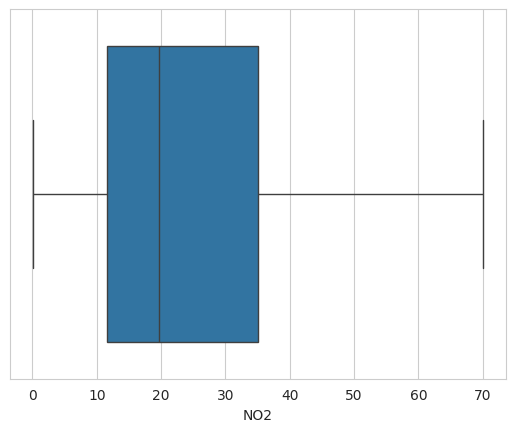

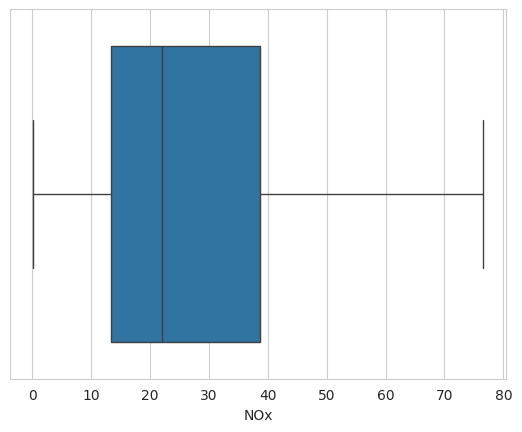

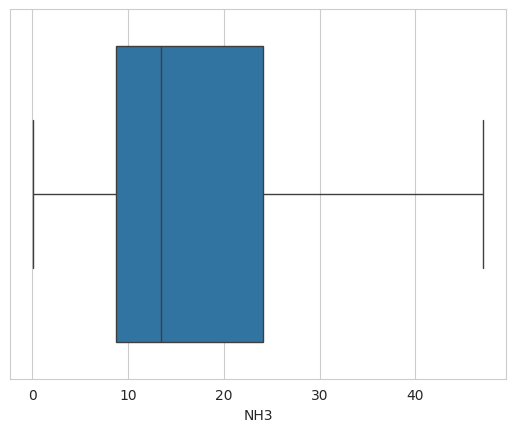

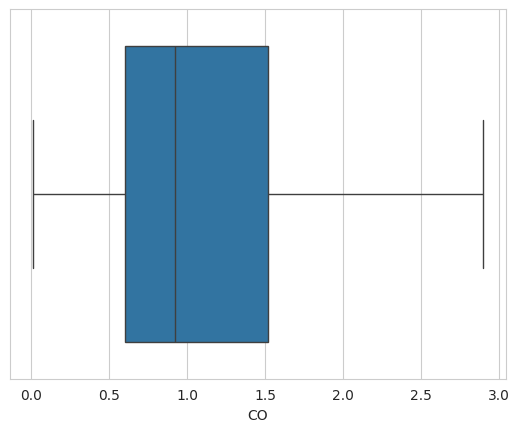

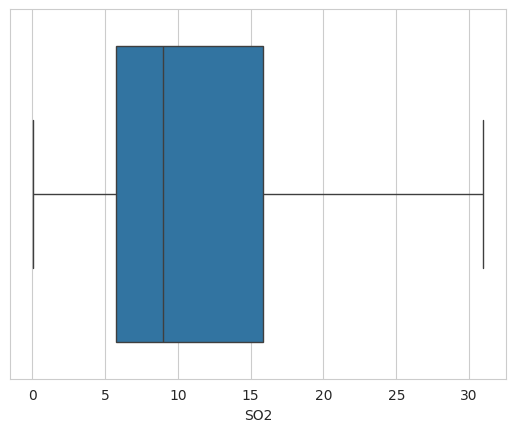

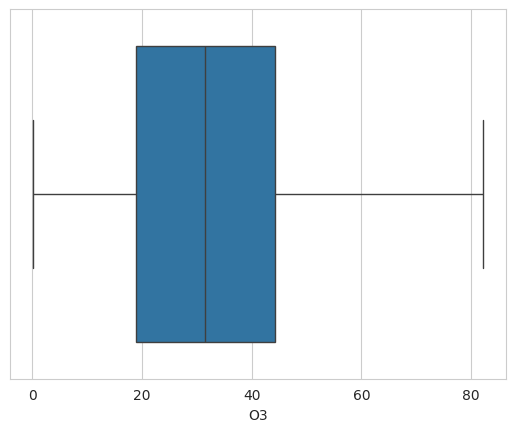

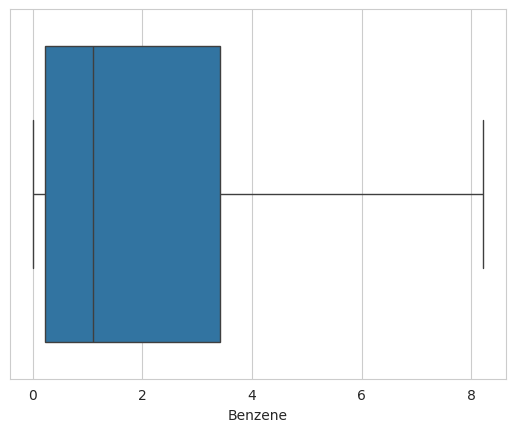

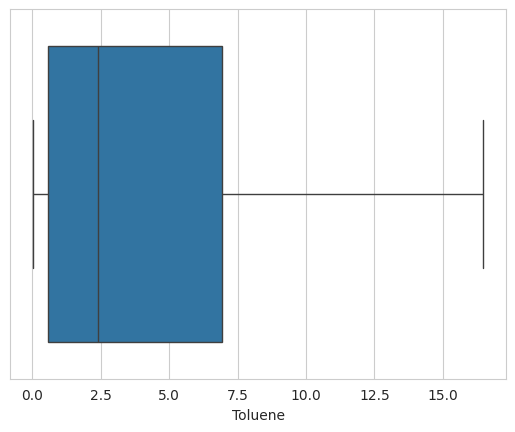

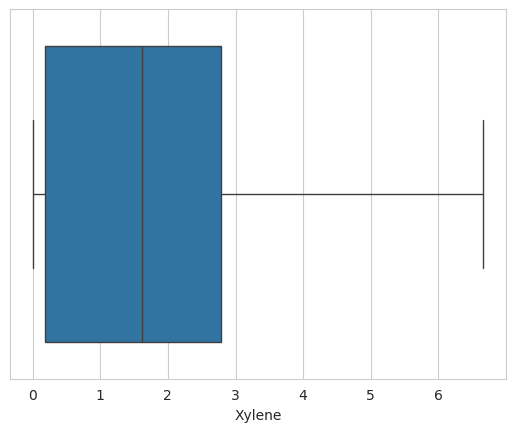

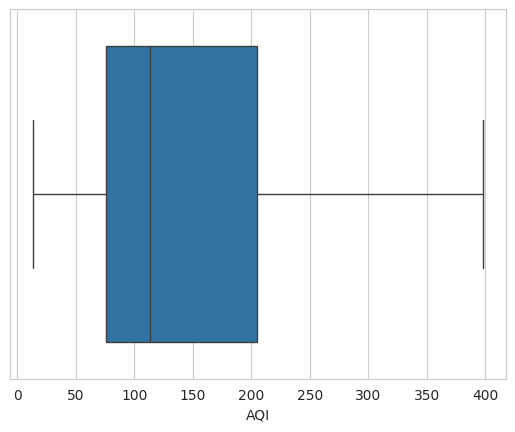

In [85]:
for i in data.select_dtypes(include="number").columns:
  sns.boxplot(data=data,x=i)
  plt.show()

# Create State Column

In [86]:
#dictionary mapping cities to states
city_to_state = {
    'Ahmedabad': 'Gujarat',
    'Aizawl': 'Mizoram',
    'Amaravati': 'Andhra Pradesh',
    'Amritsar': 'Punjab',
    'Bengaluru': 'Karnataka',
    'Bhopal': 'Madhya Pradesh',
    'Brajrajnagar': 'Odisha',
    'Chandigarh': 'Chandigarh',
    'Chennai': 'Tamil Nadu',
    'Coimbatore': 'Tamil Nadu',
    'Delhi': 'Delhi',
    'Ernakulam': 'Kerala',
    'Gurugram': 'Haryana',
    'Guwahati': 'Assam',
    'Hyderabad': 'Telangana',
    'Jaipur': 'Rajasthan',
    'Jorapokhar': 'Jharkhand',
    'Kochi': 'Kerala',
    'Kolkata': 'West Bengal',
    'Lucknow': 'Uttar Pradesh',
    'Mumbai': 'Maharashtra',
    'Patna': 'Bihar',
    'Shillong': 'Meghalaya',
    'Talcher': 'Odisha',
    'Thiruvananthapuram': 'Kerala',
    'Visakhapatnam': 'Andhra Pradesh'
}
#new column for state names
data['State'] = data['City'].map(city_to_state)

# Reorder Columns

In [92]:
if 'State' in data.columns and 'City' in data.columns:
    columns = list(data.columns)
    state_idx = columns.index('State')
    city_idx = columns.index('City')

    if state_idx != city_idx - 1:
        columns.remove('State')
        columns.insert(city_idx, 'State')
        data = data[columns]

In [96]:
data = data.sort_values(by=['State', 'City', 'Date']).reset_index(drop=True)

# Preprocessed Dataset

In [98]:
output_path = 'Preprocessed_city_day(final).csv'
data.to_csv(output_path, index=False)

print(f"Preprocessed dataset saved to {output_path}")

Preprocessed dataset saved to Preprocessed_city_day(final).csv
